In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データセットを読み込むモジュール
from sklearn.datasets import load_iris

# 標準化（分散正規化）を行うモジュール
from sklearn.preprocessing import StandardScaler

# 訓練データとテストデータを分割するモジュール
from sklearn.model_selection import train_test_split

# ロジスティック回帰を実行するモジュール
from sklearn.linear_model import LogisticRegression

# ROC曲線をプロットするモジュール
from sklearn.metrics import roc_curve

# AUCを算出するモジュール
from sklearn.metrics import roc_auc_score

# 分類の評価を行うモジュール
from sklearn.metrics import classification_report

# 混同行列を扱うモジュール
from sklearn.metrics import confusion_matrix

In [97]:
# irisデータセットの読み込み
iris = load_iris()

# 目的変数と説明変数に分ける
X, y = iris.data[:100, [0, 2]], iris.target[:100]

# 標準化（分散正規化）
std = StandardScaler()
X = std.fit_transform(X)

# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

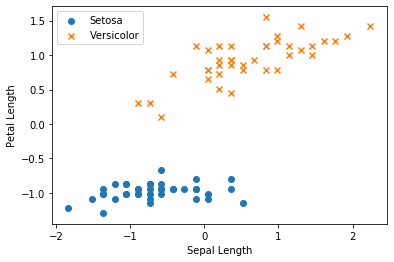

In [98]:
# 描画オブジェクトとサブプロットの作成
fig, ax = plt.subplots()

# Setosa のプロット
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
           marker = 'o', label = 'Setosa')

# Versicolor のプロット
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
           marker = 'x', label = 'Versicolor')

# 軸ラベルの設定
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')

# 凡例の設定 
ax.legend(loc = 'best')

plt.show()

In [99]:
# インスタンスを作成
logreg = LogisticRegression()

# 訓練データからモデルを作成
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<br>
まず、$z=w_0 + w_1x_1 + w_2x_2 + \cdots +w_nx_n$ の式に対して、 $ x_1 $ ～ $x_n$ に X_train を入れる<br>
<br>
次に $\sigma(z)=\frac{1}{1+\exp(-z)}$ に代入して、出力値が 0.5 を中心に 0～1 の範囲となるようにする<br>
<br>
最後に、$J(w) = \frac{1}{n}\sum_{i=1}^{n}y\log(p(x;w))+(1-y)\log(1-p(x;w))$ を用いて<br>
0に近い値なら0を、1に近い値なら1を出力する<br>
<br>
<br>
このようにシグモイド関数とコスト関数をセットにして分類するのが、ロジスティック回帰である<br>
<br>

In [100]:
y_pred = logreg.predict(X_test)
print(y_pred)

[0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1]


In [101]:
y_test

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [102]:
y_proba = logreg.predict_proba(X_test)[: , 1]
print(y_proba)

[0.02210131 0.99309888 0.95032727 0.04834431 0.99302674 0.04389388
 0.10540851 0.99718459 0.90218405 0.03983599 0.08000775 0.99280579
 0.99721384 0.78408501 0.08947531 0.01793823 0.99798469 0.01793823
 0.99429762 0.9920454 ]


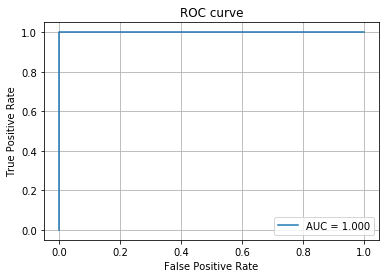

In [89]:
# ROC・AUCで予測値を評価する（正解データと予測値からfpr, tprを算出して評価する）

# 予測値と正解値があれば、AUCまで求められる
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

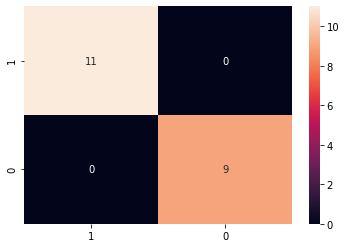

In [90]:
classes = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=classes)

cmdf = pd.DataFrame(cm, index=classes, columns=classes)

sns.heatmap(cmdf, annot=True)

In [91]:
# 適合率、再現率、F値を出力
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [92]:
print(logreg.score(X_test, y_test))

1.0
